### Visualize single detector samples

(Corner plot figure 7)

In [1]:
import bilby
import matplotlib.pyplot as plt
import glob
import numpy as np
import h5py
import pandas as pd
from pesummary.gw.conversions.evolve import evolve_angles_backwards
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict
from scipy.spatial.distance import jensenshannon
from scipy.stats import gaussian_kde
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict
from pesummary.utils.bounded_2d_kde import Bounded_2d_kde
from pesummary.utils.bounded_1d_kde import bounded_1d_kde
import seaborn as sns
import matplotlib
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 28
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 26
import matplotlib.lines as mlines
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

import config
import warnings
warnings.filterwarnings('ignore')

/home/pe.o4/GWTC4-fogg/environment/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pe.o4/GWTC4-fogg/environment/lib/python3.10/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
#remove default vertical lines
def remove_vlines():
    n_params = 6  # since you have two parameters: m1, m2
    for i in range(n_params):
        ax = axs[i * (n_params + 1)]
        for line in list(ax.lines):  # make a copy so we can safely remove
            xdata = line.get_xdata()
            # Remove only vertical lines (x constant)
            if len(set(np.round(xdata, 8))) == 1:
                line.remove()


In [3]:
#remove default PE summary legend
def remove_legend():
    
    if hasattr(fig, "legends"):
        for leg in list(fig.legends):
            try:
                leg.remove()
            except Exception:
                pass
    
    if getattr(fig, "legend_", None) is not None:
        try:
            fig.legend_.remove()
        except Exception:
            pass
    
    if getattr(fig, "_legend", None) is not None:
        try:
            fig._legend.remove()
        except Exception:
            pass
    
    # 2) Remove axis-level legends
    for ax in fig.axes:
        leg = ax.get_legend()
        if leg is not None:
            try:
                leg.remove()
            except Exception:
                # fallback: hide it
                try:
                    leg.set_visible(False)
                except Exception:
                    pass
    
    # 3) Global pyplot fallback (if anything was created on current figure via plt)
    try:
        lg = plt.gca().get_legend()
        if lg is not None:
            lg.remove()
    except Exception:
        pass


### Load PE samples

In [4]:
H1_nrsur =config.H_only_NRSUR
L1_nrsur =config.L_only_NRSUR
L1H1_nrsur = config.gw231123_BF_NRSUR
    
data_3 = MultiAnalysisSamplesDict.from_files({
    "LIGO Hanford": H1_nrsur,
    "LIGO Livingston": L1_nrsur,
    "LIGO Hanford and Livingston": L1H1_nrsur
    })

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


22:14 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
22:14 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  22:14:38 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  22:14:38 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  22:14:45 PESummary INFO    : Averaging the final spin from the following fits: function bbh_final_spin_precessing_projected_UIB2016 at 0x7f329f977370, function bbh_final_spin_precessing_projected_Healyetal at 0x7f329f9771c0, function bbh_final_spin_precessing_HBR2016 at 0x7f329f977520
2026-0

In [5]:
#Generate chi eff and chi p prior
data_bilby = bilby.result.read_in_result(H1_nrsur)

priors = data_bilby.priors.sample(size=10000)
priors = bilby.gw.conversion.generate_all_bbh_parameters(priors)
spin_priors=[]
for i, param in enumerate(['chi_eff','chi_p']):
    spin_priors.append(priors[param])
spin_priors

22:17 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
22:17 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.


[array([ 0.03997317, -0.10392138, -0.40599429, ...,  0.24025314,
         0.03000652, -0.16122431]),
 array([0.74674571, 0.96075414, 0.69071526, ..., 0.429664  ,
        0.12795343, 0.71223666])]

Create plot

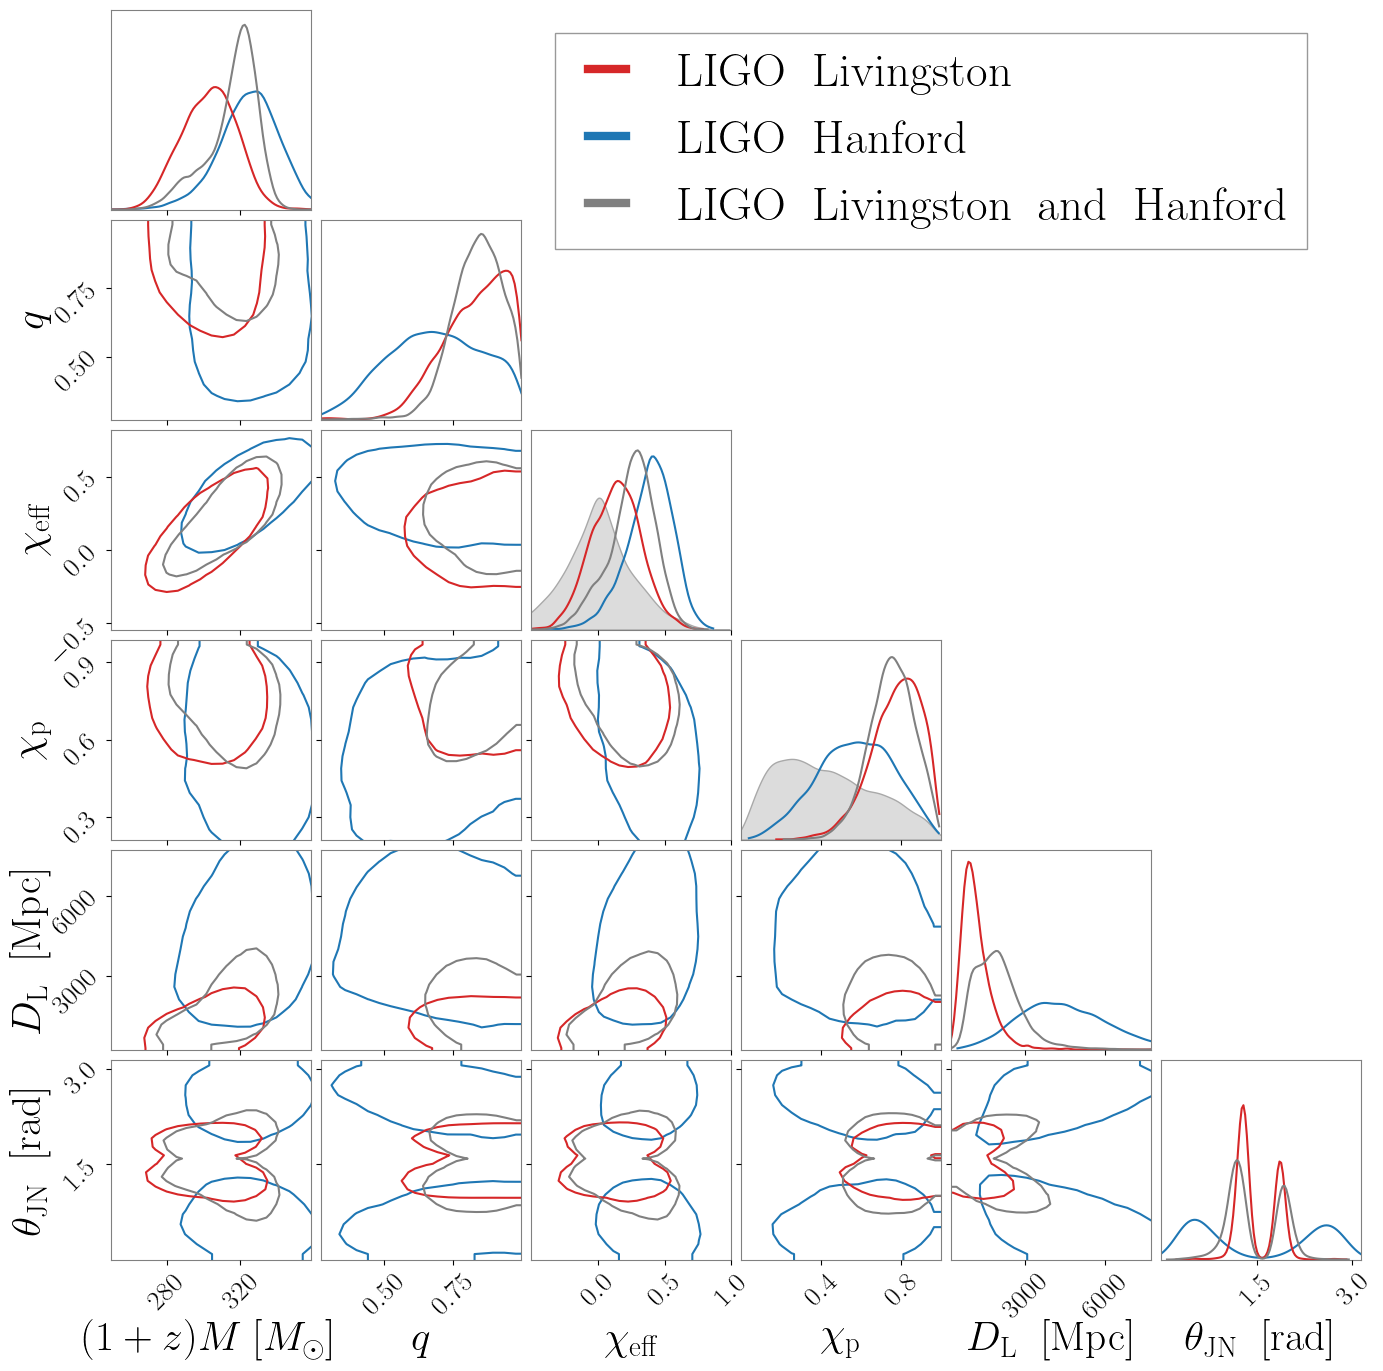

In [6]:
fig = data_3.plot(
    parameters=["total_mass", "mass_ratio", "chi_eff", "chi_p", "luminosity_distance", "theta_jn"], type="corner",
    kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde, bins=100,
    colors=["tab:blue", "tab:red", "gray"],
    levels=[0.9],
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )

#fix axes limits
axs = fig.axes
axs[0].set_ylim(0,0.042) 
axs[14].set_xlim(-0.5,1) 
axs[14].set_ylim(0,2.85) 
axs[28].set_ylim(0,0.001) 
axs[35].set_ylim(0,3.4) 

axs[20].set_xlim(-0.5,1) 
axs[26].set_xlim(-0.5,1) 
axs[32].set_xlim(-0.5,1) 
axs[21].set_xlim(0,1) 
axs[27].set_xlim(0,1) 
axs[33].set_xlim(0,1) 

axs[35].set_xlim(0,np.pi) 
axs[30].set_ylim(0,np.pi) 
axs[31].set_ylim(0,np.pi) 
axs[32].set_ylim(0,np.pi) 
axs[33].set_ylim(0,np.pi) 
axs[34].set_ylim(0,np.pi) 

#set labels
fs=30
axs[6].set_ylabel(r'$q$',fontsize=fs)
axs[12].set_ylabel(r"$\chi_{\mathrm{eff}}$",fontsize=fs)
axs[18].set_ylabel(r"$\chi_{\mathrm{p}}$",fontsize=fs)
axs[24].set_ylabel(r'$D_{\rm{L}} \ \ \mathrm{[Mpc]}$',fontsize=fs)
axs[30].set_ylabel(r'$\theta_{\mathrm{JN}} \ \ \mathrm{[rad]}$ ',fontsize=fs)

axs[30].set_xlabel(r"$(1+z)M \ \mathrm{[} M_\odot \mathrm{]} $",fontsize=fs)
axs[31].set_xlabel(r"$q$",fontsize=fs)
axs[32].set_xlabel(r"$\chi_{\mathrm{eff}}$", fontsize=fs)
axs[33].set_xlabel(r"$\chi_{\mathrm{p}}$",fontsize=fs)
axs[34].set_xlabel(r'$D_{\rm{L}}\ \ \mathrm{[Mpc]}$',fontsize=fs)
axs[35].set_xlabel(r'$\theta_{\mathrm{JN}} \ \ \mathrm{[rad]}$ ',fontsize=fs)

remove_legend()

#set legend
fp = FontProperties(family="STIXGeneral", size=34)          # legend entries

model_handles = [
    mlines.Line2D([], [], color="tab:red", linestyle="-",
                  label=r"$\mathrm{LIGO \ \ Livingston}$"),
    mlines.Line2D([], [], color="tab:blue", linestyle="-",
                label=r"$\mathrm{LIGO \ \ Hanford}$"),
    mlines.Line2D([], [], color="gray", linestyle="-",
                  label=r"$\mathrm{LIGO \ \ Livingston \ \ and \ \ Hanford}$"),
]

# Combine them in one legend
all_handles = model_handles 

remove_vlines()
#add spin priors
sns.kdeplot(spin_priors[0], color='darkgrey', alpha=0.4, ax=axs[14], fill=True)
sns.kdeplot(spin_priors[1], color='darkgrey', alpha=0.4, ax=axs[21], fill=True)

for i in range(0, 36):
    axs[i].grid(False)

axs[2].legend(handles=all_handles,prop=fp, frameon=True, loc="upper left",handlelength=1.4)